In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2022-12-17 15:36:36.178645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
train_data = pd.read_csv('test_train/train.csv')
test_data = pd.read_csv('test_train/test.csv')
train_data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,-20.864520,-42.430859,78.140250,-39.567953,24.000293,-82.891571,-282.647472,16.400032,-28.310477,30.864054,...,0.000929,0.000898,0.000916,0.002302,0.000786,0.000638,0.000841,0.000423,0.001206,2.0
1,32.333344,34.814816,29.125215,23.685465,-0.296074,-1.376449,6.420872,-1.760166,35.318475,35.214108,...,0.001305,0.001161,0.001358,0.000568,0.000837,0.000741,0.000990,0.001044,0.000459,2.0
2,19.691453,28.272656,23.416547,14.066691,0.665121,-9.967500,2.714892,0.043821,15.870414,34.003659,...,0.010825,0.011491,0.013394,0.006739,0.009622,0.002830,0.013745,0.014137,0.007547,1.0
3,17.414724,40.282249,-28.755412,7.905572,-17.867971,2.665896,114.616383,-12.023282,27.558607,39.130842,...,0.000778,0.001284,0.001017,0.000806,0.000930,0.000481,0.000991,0.000768,0.000183,2.0
4,26.454867,30.992543,23.258215,18.173215,-0.117299,-0.655113,1.761777,1.415737,26.360854,31.876262,...,0.005316,0.003894,0.000148,0.002691,0.003112,0.005233,0.001622,0.005178,0.004374,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,22.893855,30.412723,26.029590,14.249789,-7.101478,-0.551013,3.735563,-9.372750,30.411574,30.079904,...,0.002470,0.003917,0.002528,0.005357,0.004612,0.004503,0.003669,0.002316,0.004765,1.0
1805,25.821699,34.387621,26.077270,-1.592625,2.282446,-4.974718,-1.937057,0.393189,19.731435,33.790264,...,0.012745,0.010334,0.007274,0.013420,0.007401,0.004398,0.008119,0.005823,0.006763,0.0
1806,17.711652,22.157684,31.360652,21.293648,5.794195,-6.451099,-10.117324,-9.091782,7.688381,-5.393554,...,0.003812,0.004180,0.004638,0.007078,0.010407,0.000410,0.007204,0.001841,0.006530,2.0
1807,9.811422,17.770766,29.897723,10.740277,-3.584225,-2.966593,-2.135374,-3.058710,12.973076,20.127879,...,0.010962,0.030636,0.027268,0.005662,0.015756,0.010939,0.002563,0.020476,0.006581,0.0


In [14]:
test_data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,22.748918,22.346566,25.287641,5.136504,2.489290,1.430381,1.219505,0.619600,21.076752,23.127146,...,0.024968,0.014892,0.025350,0.003335,0.006135,0.013545,0.018810,0.005598,0.010112,0.0
1,53.167348,29.899617,-53.899781,37.067426,-31.999664,-6.244550,-10.205804,-30.779264,93.524951,37.682383,...,0.002283,0.000670,0.001303,0.000687,0.000899,0.001852,0.000705,0.001225,0.000572,2.0
2,35.692400,42.357925,20.877380,27.992871,2.313634,-2.263806,-7.311107,0.150947,40.457556,49.434760,...,0.006935,0.001110,0.005829,0.002584,0.014134,0.010048,0.011171,0.005336,0.008351,1.0
3,27.496336,20.496406,31.045867,-3.162359,-8.435205,2.915673,-3.596188,-13.659502,32.884671,19.718149,...,0.006642,0.006767,0.004741,0.005504,0.008984,0.008483,0.003550,0.007141,0.006300,1.0
4,12.329082,11.957141,22.539152,8.703227,0.641128,9.424014,-1.638213,0.432990,12.814116,2.607838,...,0.000996,0.006356,0.005037,0.017161,0.013113,0.007897,0.021231,0.002593,0.007199,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,24.957676,20.648984,23.694992,19.872664,1.854249,-2.489263,6.400023,-4.558442,24.668521,23.597104,...,0.002875,0.006344,0.006759,0.003273,0.009556,0.008703,0.002068,0.004183,0.001497,0.0
666,23.006434,33.353789,-109.792707,19.876480,2.940309,5.637764,93.453482,-0.659773,16.472983,28.235343,...,0.000519,0.001797,0.000369,0.001646,0.001433,0.000393,0.000542,0.000327,0.000551,2.0
667,30.374551,32.186508,61.786633,22.520090,30.429391,0.623961,17.531494,29.322975,33.374972,33.761127,...,0.001757,0.001619,0.003902,0.002973,0.000594,0.001363,0.001900,0.001287,0.001408,2.0
668,30.691148,-31.091707,26.287078,26.842125,8.294064,26.946822,-4.441319,-7.735403,26.977287,-63.973499,...,0.009668,0.005261,0.006778,0.003788,0.005694,0.004122,0.008907,0.005087,0.009000,2.0


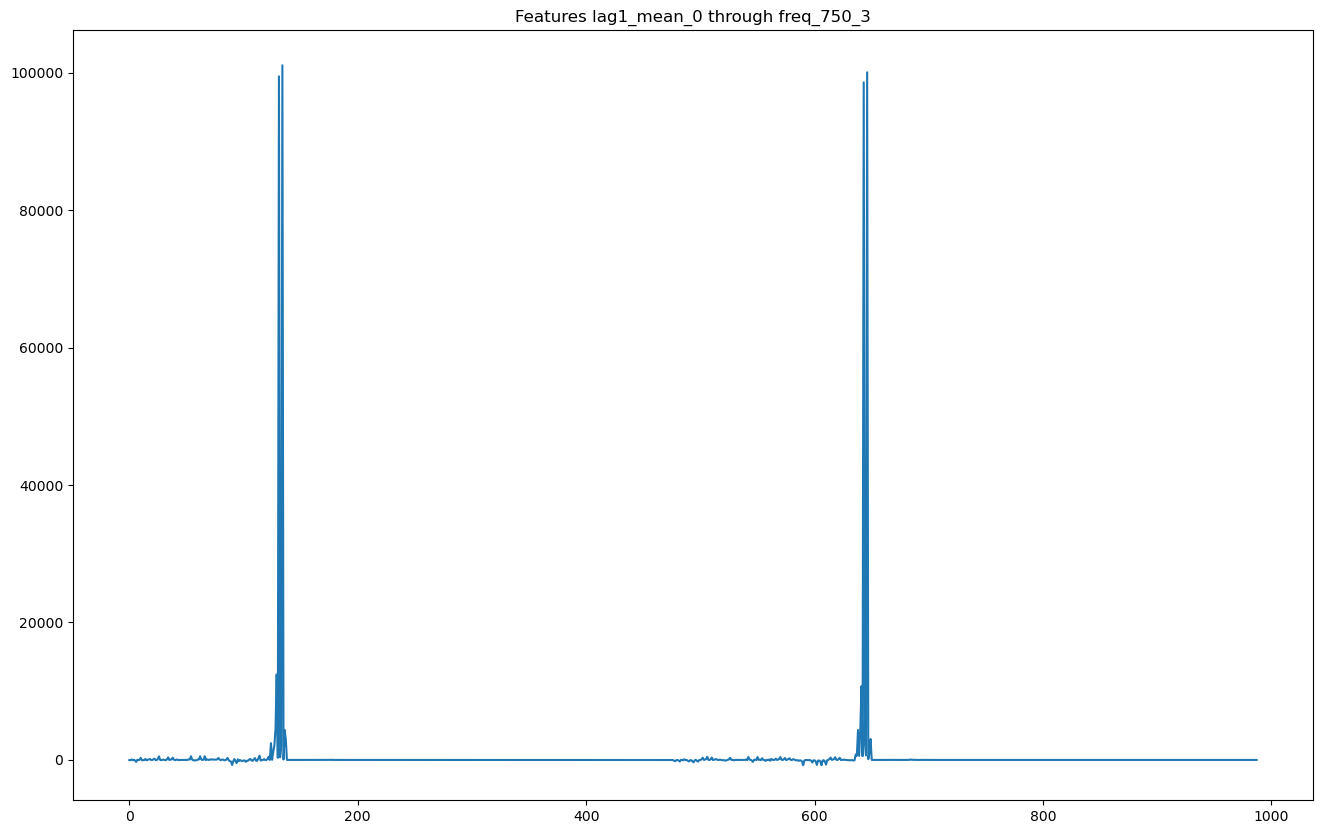

In [15]:
sample = train_data.loc[0, 'lag1_mean_0':'freq_750_3']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features lag1_mean_0 through freq_750_3")
plt.show()

In [16]:
train_data['Label'].value_counts()

0.0    609
1.0    605
2.0    595
Name: Label, dtype: int64

In [17]:
label_mapping = {'RELAXED': 0, 'NEUTRAL': 1, 'CONCENTRATING': 2}

In [18]:
def preprocess_inputs(train_data, test_data):
    train_data = train_data.copy()
    test_data = test_data.copy()
    
    train_data['Label'] = train_data['Label'].replace(label_mapping)
    test_data['Label'] = test_data['Label'].replace(label_mapping)
    
    y_train = train_data['Label'].copy()
    X_train = train_data.drop('Label', axis=1).copy()
    
    y_test = test_data['Label'].copy()
    X_test = test_data.drop('Label', axis=1).copy()
    
    return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = preprocess_inputs(train_data, test_data)
X_train

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
0,-20.864520,-42.430859,78.140250,-39.567953,24.000293,-82.891571,-282.647472,16.400032,-28.310477,30.864054,...,0.000840,0.000929,0.000898,0.000916,0.002302,0.000786,0.000638,0.000841,0.000423,0.001206
1,32.333344,34.814816,29.125215,23.685465,-0.296074,-1.376449,6.420872,-1.760166,35.318475,35.214108,...,0.000369,0.001305,0.001161,0.001358,0.000568,0.000837,0.000741,0.000990,0.001044,0.000459
2,19.691453,28.272656,23.416547,14.066691,0.665121,-9.967500,2.714892,0.043821,15.870414,34.003659,...,0.023811,0.010825,0.011491,0.013394,0.006739,0.009622,0.002830,0.013745,0.014137,0.007547
3,17.414724,40.282249,-28.755412,7.905572,-17.867971,2.665896,114.616383,-12.023282,27.558607,39.130842,...,0.000907,0.000778,0.001284,0.001017,0.000806,0.000930,0.000481,0.000991,0.000768,0.000183
4,26.454867,30.992543,23.258215,18.173215,-0.117299,-0.655113,1.761777,1.415737,26.360854,31.876262,...,0.001291,0.005316,0.003894,0.000148,0.002691,0.003112,0.005233,0.001622,0.005178,0.004374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,22.893855,30.412723,26.029590,14.249789,-7.101478,-0.551013,3.735563,-9.372750,30.411574,30.079904,...,0.004957,0.002470,0.003917,0.002528,0.005357,0.004612,0.004503,0.003669,0.002316,0.004765
1805,25.821699,34.387621,26.077270,-1.592625,2.282446,-4.974718,-1.937057,0.393189,19.731435,33.790264,...,0.006618,0.012745,0.010334,0.007274,0.013420,0.007401,0.004398,0.008119,0.005823,0.006763
1806,17.711652,22.157684,31.360652,21.293648,5.794195,-6.451099,-10.117324,-9.091782,7.688381,-5.393554,...,0.006722,0.003812,0.004180,0.004638,0.007078,0.010407,0.000410,0.007204,0.001841,0.006530
1807,9.811422,17.770766,29.897723,10.740277,-3.584225,-2.966593,-2.135374,-3.058710,12.973076,20.127879,...,0.012444,0.010962,0.030636,0.027268,0.005662,0.015756,0.010939,0.002563,0.020476,0.006581


In [20]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

2022-12-17 19:00:53.677297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 988)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 988, 1)           0         
                                                                 
 gru (GRU)                   (None, 988, 256)          198912    
                                                                 
 flatten (Flatten)           (None, 252928)            0         
                                                                 
 dense (Dense)               (None, 3)                 758787    
                                                                 
Total params: 957,699
Trainable params: 957,699
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train,
                   y_train,
                   validation_split = 0.2,
                    epochs = 30
                        )

Epoch 1/30
46/46 [==============================] - 67s 1s/step - loss: 3.5063 - accuracy: 0.7111 - val_loss: 0.6791 - val_accuracy: 0.8923
Epoch 2/30
46/46 [==============================] - 54s 1s/step - loss: 0.5559 - accuracy: 0.8825 - val_loss: 0.4069 - val_accuracy: 0.9254
Epoch 3/30
46/46 [==============================] - 51s 1s/step - loss: 0.2688 - accuracy: 0.9254 - val_loss: 0.3649 - val_accuracy: 0.8923
Epoch 4/30
46/46 [==============================] - 63s 1s/step - loss: 0.1603 - accuracy: 0.9475 - val_loss: 0.3655 - val_accuracy: 0.9033
Epoch 5/30
46/46 [==============================] - 84s 2s/step - loss: 0.1872 - accuracy: 0.9475 - val_loss: 0.5742 - val_accuracy: 0.9033
Epoch 6/30
46/46 [==============================] - 70s 2s/step - loss: 0.0789 - accuracy: 0.9668 - val_loss: 0.4309 - val_accuracy: 0.9337
Epoch 7/30
46/46 [==============================] - 79s 2s/step - loss: 0.0966 - accuracy: 0.9765 - val_loss: 0.4344 - val_accuracy: 0.9337
Epoch 8/30
46/46 [==

In [56]:
model_acc = model.evaluate(X_test, y_test, verbose = 0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 94.478%


21/21 [==============================] - 8s 381ms/step


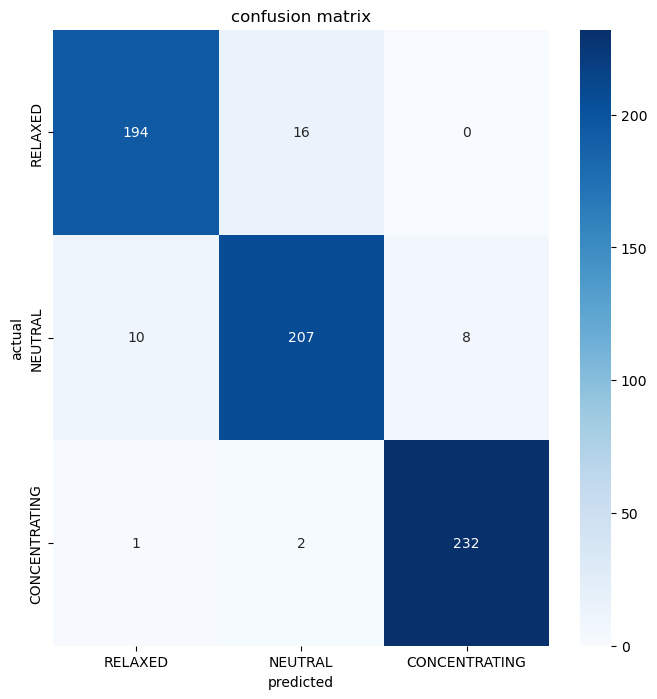

Classification Report:
----------------------
                precision    recall  f1-score   support

      RELAXED       0.95      0.92      0.93       210
      NEUTRAL       0.92      0.92      0.92       225
CONCENTRATING       0.97      0.99      0.98       235

     accuracy                           0.94       670
    macro avg       0.94      0.94      0.94       670
 weighted avg       0.94      0.94      0.94       670



In [57]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, vmin = 0, fmt='g', cbar='False', cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)
                  